#1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore') # Ignore warnings



---


#2. Load and Inspect Data

In [ ]:
df = pd.read_csv(r"stroke.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201




---


#3. Data Preprocessing

In [ ]:
bmiMedian= df["bmi"].median()
df["bmi"].fillna(bmiMedian,inplace=True)
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df[df['gender'] != 'Other']



---


#4. Exploratory Data Analysis (EDA)

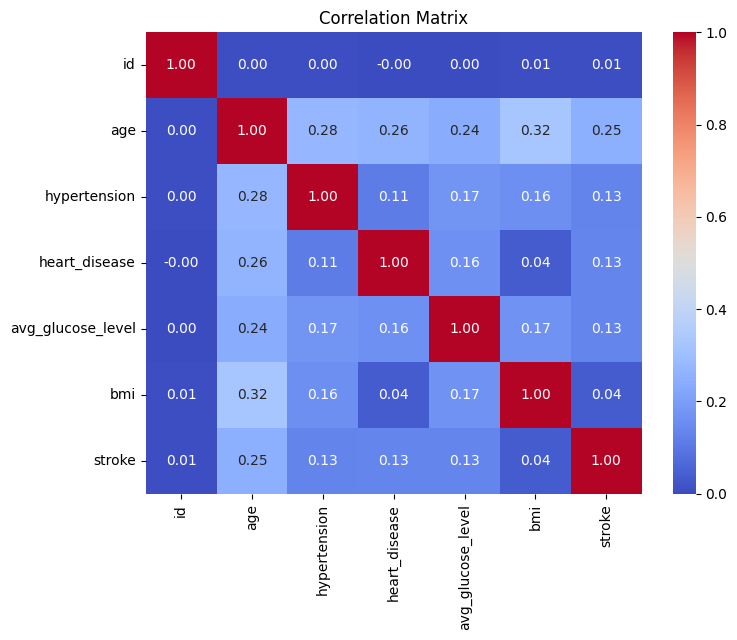

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
correlations = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

* Age is the most important individual factor for stroke in this dataset.



* Hypertension, heart disease, and glucose levels are weakly linked to stroke but still relevant.

* BMI has almost no direct correlation with stroke.it has the lowest correlation with stroke.

In [ ]:
df["stroke"].value_counts()

,count
stroke,
0,4860
1,249


In [ ]:
categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married",
                    "work_type", "Residence_type", "smoking_status", "stroke"]

for col in categorical_cols:
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")


Value Counts for gender:
gender
Female    2994
Male      2115
Name: count, dtype: int64

Value Counts for hypertension:
hypertension
0    4611
1     498
Name: count, dtype: int64

Value Counts for heart_disease:
heart_disease
0    4833
1     276
Name: count, dtype: int64

Value Counts for ever_married:
ever_married
Yes    3353
No     1756
Name: count, dtype: int64

Value Counts for work_type:
work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value Counts for Residence_type:
Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

Value Counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

Value Counts for stroke:
stroke
0    4860
1     249
Name: count, dtype: int64



<Axes: xlabel='gender'>

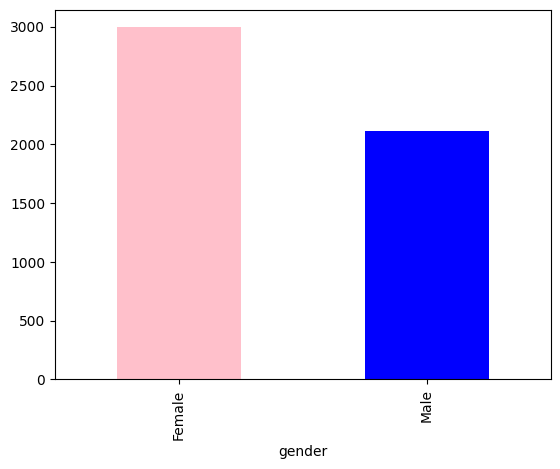

In [ ]:
df["gender"].value_counts().plot(kind="bar",color=["pink","blue"])




* **Gender:** More females than males.
* **Hypertension:** Majority don’t have it.
* **Heart Disease:** Most patients are heart disease-free.
* **Marital Status:** More married than unmarried.
* **Work Type:** Mostly private sector employees, very few never worked.
* **Residence:** Almost equal urban and rural distribution.
* **Smoking:** Many never smoked, but a large portion of data is unknown.
* **Stroke Cases:** Very few had a stroke, making the dataset highly imbalanced.



---


##5. Data Analysis

In [ ]:
df1 = df[df["stroke"] == 1]
nostroke=df[df["stroke"]==0]


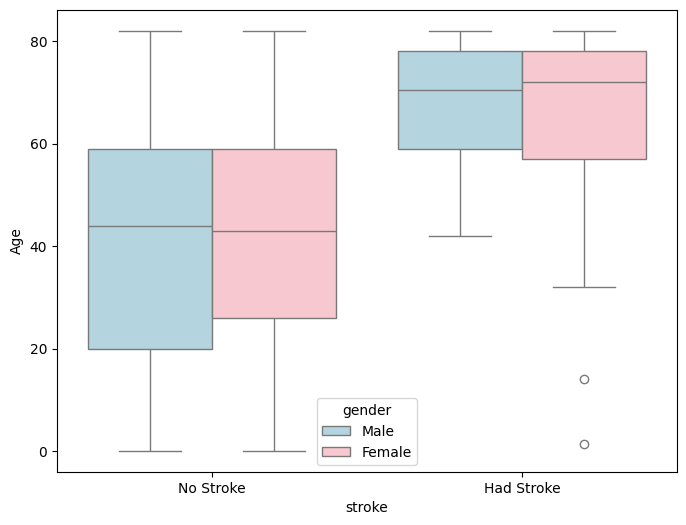

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="stroke", y="age", hue="gender", palette={"Male": "lightblue", "Female": "pink"})

plt.ylabel("Age")
plt.xticks([0,1], ["No Stroke", "Had Stroke"])
plt.show()

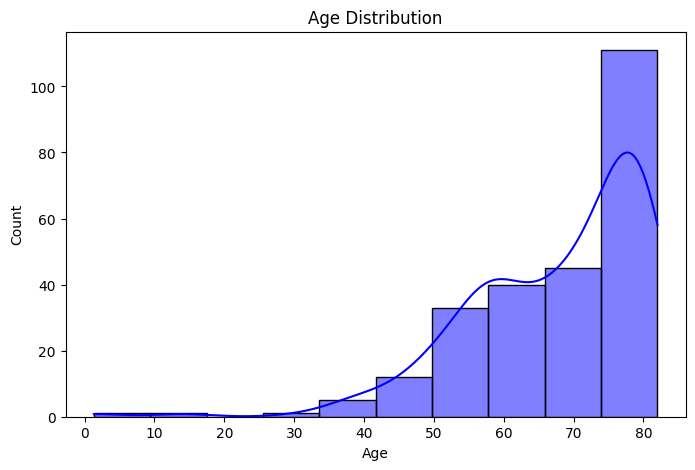

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df1["age"], bins=10, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



*   Stroke cases are more common in older individuals.

*  A few younger individuals experienced strokes, but they are exceptions.

*   Both males and females have similar distributions within each stroke category.

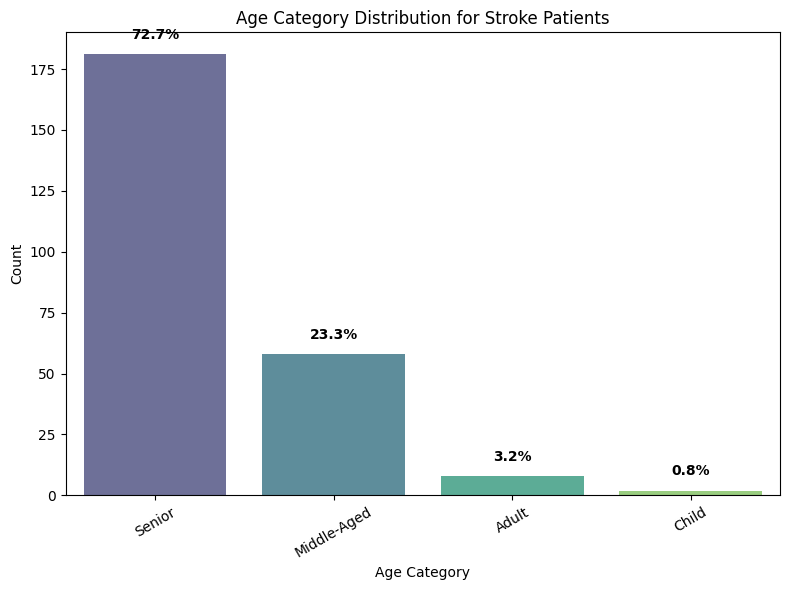

In [ ]:
def categorize_age(age):
    if age < 18:
        return "Child"
    elif 18 <= age < 30:
        return "Young Adult"
    elif 30 <= age < 45:
        return "Adult"
    elif 45 <= age < 60:
        return "Middle-Aged"
    else:
        return "Senior"


df1["age_category"] = df1["age"].apply(categorize_age)
stroke_df = df1[df1["stroke"] == 1]


age_category_counts = stroke_df["age_category"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=age_category_counts.index, y=age_category_counts.values, palette="viridis", alpha=0.8)


plt.xlabel("Age Category", size=10)
plt.ylabel("Count", size=10)
plt.title("Age Category Distribution for Stroke Patients", size=12)


total = age_category_counts.sum()
for i, value in enumerate(age_category_counts.values):
    plt.text(i, value + (total * 0.02), f"{value/total*100:.1f}%",
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


* The vast majority of stroke cases occur in seniors (72.7%), followed by middle-aged individuals (23.3%).

* Very few stroke cases are observed in adults and children.
* This suggests that older age is a significant risk factor for stroke.

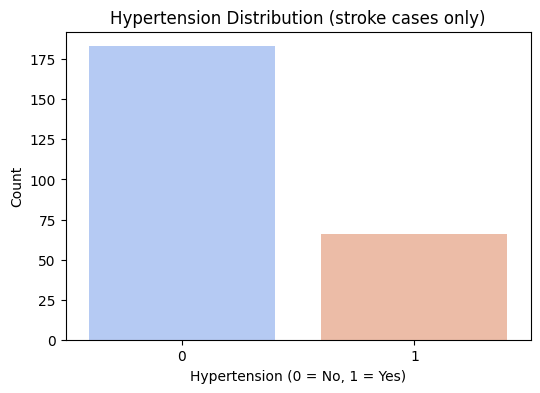

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="hypertension", data=df1, hue="hypertension", palette="coolwarm", legend=False)

plt.title("Hypertension Distribution (stroke cases only)")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

* A large proportion of stroke patients do not have hypertension.
* However, a considerable number of stroke patients do have hypertension, indicating it is still an important risk factor.

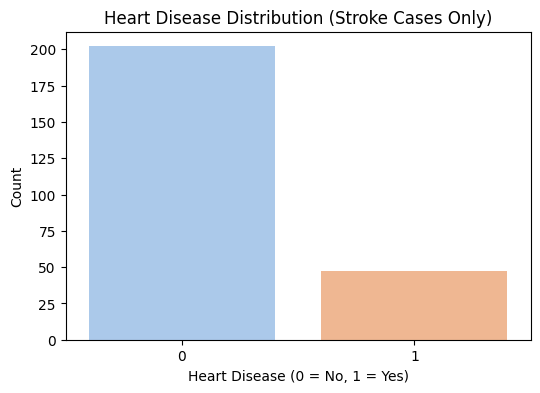

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="heart_disease", data=df1, hue="heart_disease", palette="pastel", legend=False)

plt.title("Heart Disease Distribution (Stroke Cases Only)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


* The majority of stroke patients do not have heart disease, but a notable minority does.
* This suggests that while heart disease increases the risk of stroke, it is not the sole contributing factor.

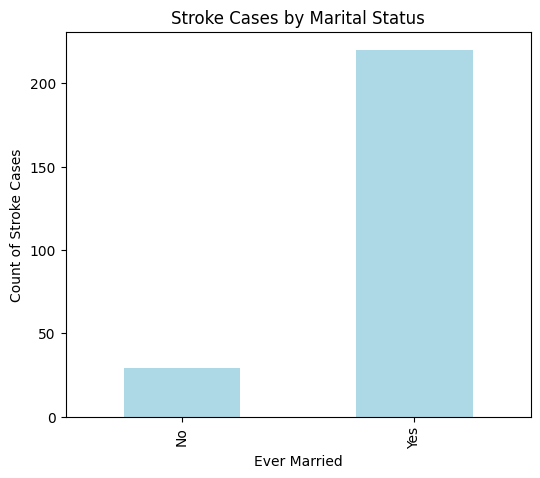

In [ ]:
stroke_counts = df.groupby("ever_married")["stroke"].sum()
stroke_counts.plot(kind="bar", color="lightblue", figsize=(6,5))

plt.xlabel("Ever Married")
plt.ylabel("Count of Stroke Cases")
plt.title("Stroke Cases by Marital Status")
plt.show()

* The majority of stroke cases are from individuals who have been married at some point.
* A much smaller proportion of stroke cases are from individuals who have never been married.

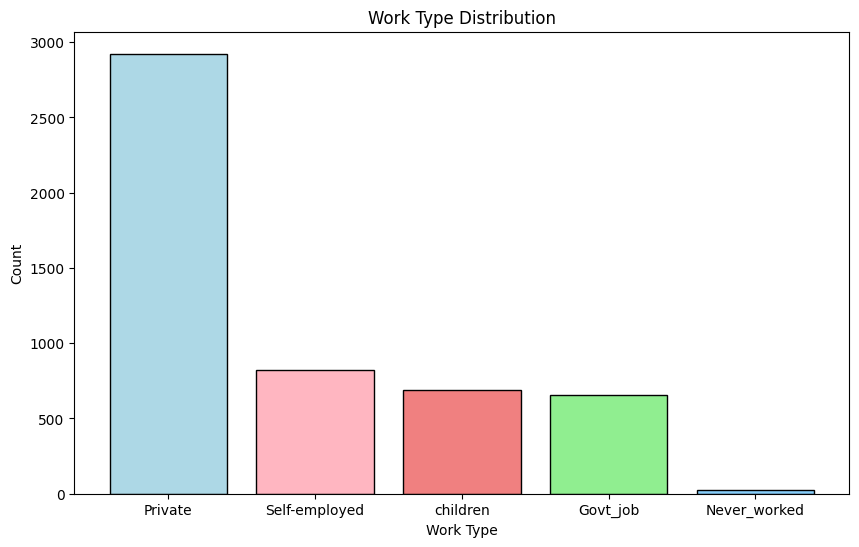

In [ ]:
import matplotlib.pyplot as plt
work_counts = df["work_type"].value_counts()
colors = ['lightblue', 'lightpink', 'lightcoral', 'lightgreen', 'lightskyblue']

plt.figure(figsize=(10, 6))
plt.bar(work_counts.index, work_counts.values, color=colors, edgecolor='black')


plt.title("Work Type Distribution")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.show()

* Most individuals in the dataset work in the private sector, significantly more than other categories.
* Self-employed, government jobs, and children have roughly similar counts.
* Very few individuals have never worked.

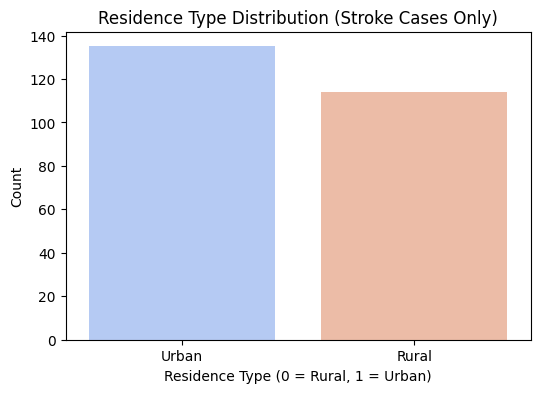

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Residence_type", data=df1, hue="Residence_type", palette="coolwarm", legend=False)

plt.title("Residence Type Distribution (Stroke Cases Only)")
plt.xlabel("Residence Type (0 = Rural, 1 = Urban)")
plt.ylabel("Count")
plt.show()


Stroke cases are slightly more common in urban areas than in rural areas, but the difference is not dramatic.

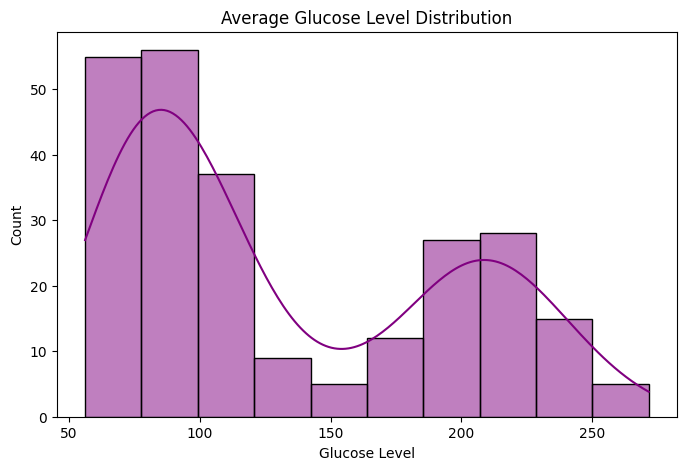

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df1["avg_glucose_level"], bins=10, kde=True, color="purple")
plt.title("Average Glucose Level Distribution")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()


* The first peak (80-100 mg/dL) represents stroke patients with normal glucose levels (35% of the data).
* The second peak (~200 mg/dL) indicates that around 30% of stroke patients have severe hyperglycemia, which could have contributed to their stroke.

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

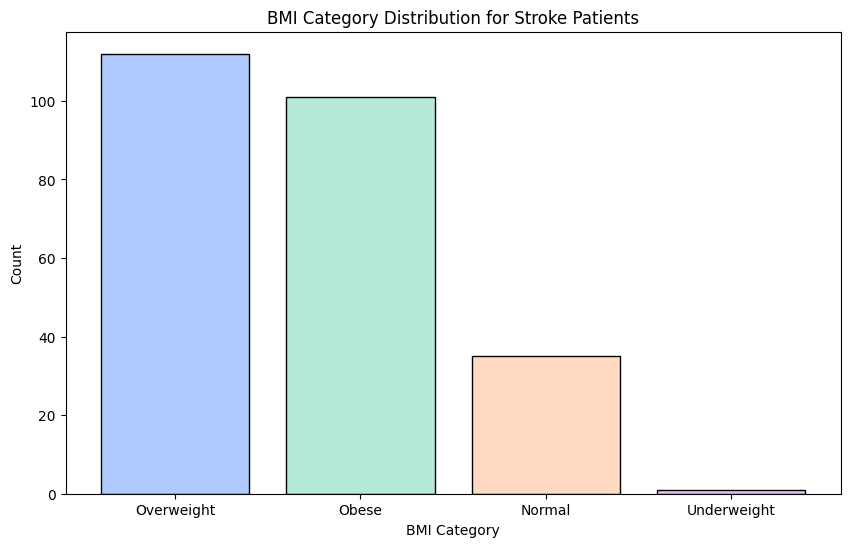

In [ ]:
df1["bmi"] = pd.to_numeric(df1["bmi"], errors="coerce")

def categorize_bmi(bmi):

    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

if df1["bmi"].dtype != "object":
    df1["bmi"] = df1["bmi"].apply(categorize_bmi)

bmi_counts = df1["bmi"].value_counts()

colors = ["#AFCBFF", "#B5EAD7", "#FFDAC1", "#E2C2FF", "#D9D9D9"]

plt.figure(figsize=(10, 6))
plt.bar(bmi_counts.index, bmi_counts.values, color=colors, edgecolor="black")
plt.title("BMI Category Distribution for Stroke Patients")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

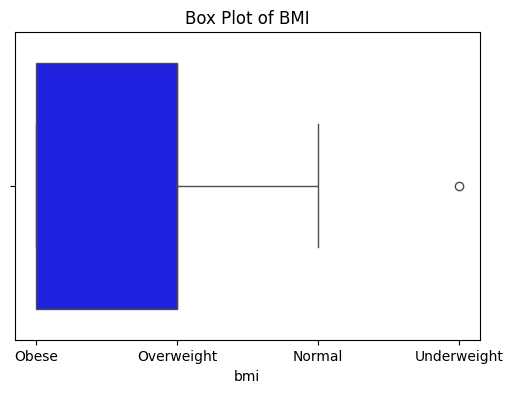

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df1["bmi"], color="blue")
plt.title("Box Plot of BMI")
plt.show()


* BMI appears to be a major risk factor for stroke.
* Obese and overweight individuals account for nearly 90% of stroke cases.

smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
1                    47               70            90      42


<Axes: xlabel='stroke'>

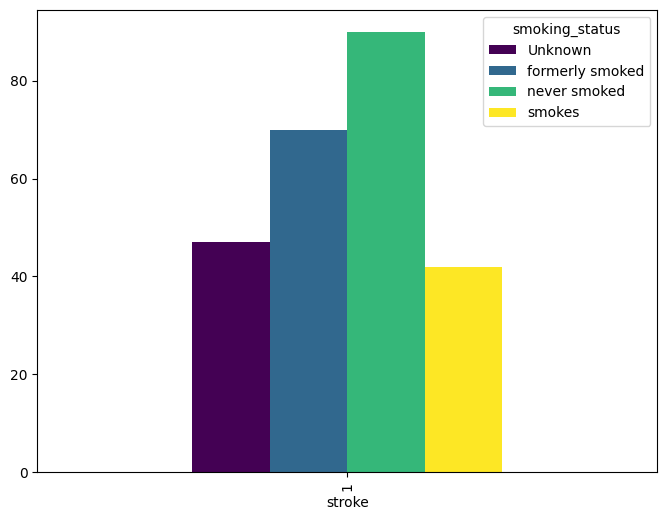

In [ ]:
cross = pd.crosstab(df1["stroke"], df1["smoking_status"])
print(cross)
cross.plot(kind="bar", figsize=(8,6), colormap="viridis")

* Majority of Stroke Patients Never Smoked

* Quitting smoking does not immediately eliminate stroke risk—former smokers still have a significant stroke occurrence.


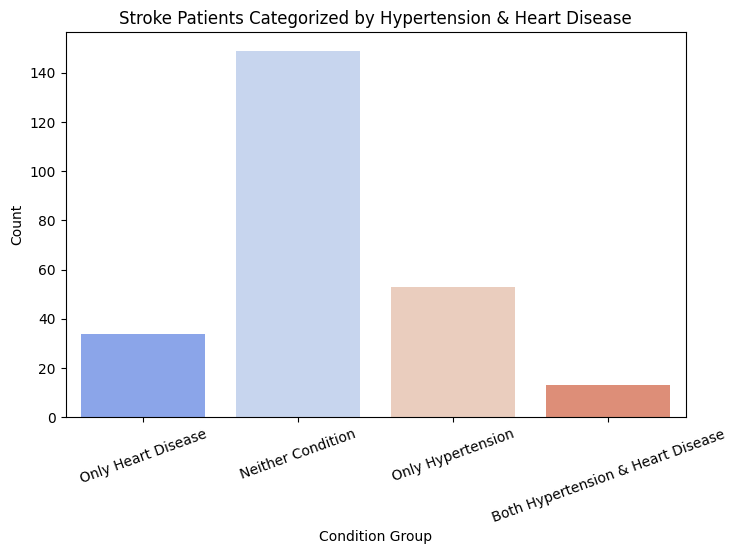

In [ ]:
def categorize_patient(row):
    if row["hypertension"] == 1 and row["heart_disease"] == 1:
        return "Both Hypertension & Heart Disease"
    elif row["hypertension"] == 1 and row["heart_disease"] == 0:
        return "Only Hypertension"
    elif row["hypertension"] == 0 and row["heart_disease"] == 1:
        return "Only Heart Disease"
    else:
        return "Neither Condition"


df1["Condition_Group"] = df1.apply(categorize_patient, axis=1)
plt.figure(figsize=(8, 5))
sns.countplot(x="Condition_Group", data=df1, palette="coolwarm")


plt.title("Stroke Patients Categorized by Hypertension & Heart Disease")
plt.xlabel("Condition Group")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()

In [ ]:
def categorize_age(age):
    if age < 30:
        return "Young (<30)"
    elif 30 <= age < 50:
        return "Middle-aged (30-49)"
    elif 50 <= age < 70:
        return "Older (50-69)"
    else:
        return "Elderly (70+)"

df1["Age_Group"] = df1["age"].apply(categorize_age)

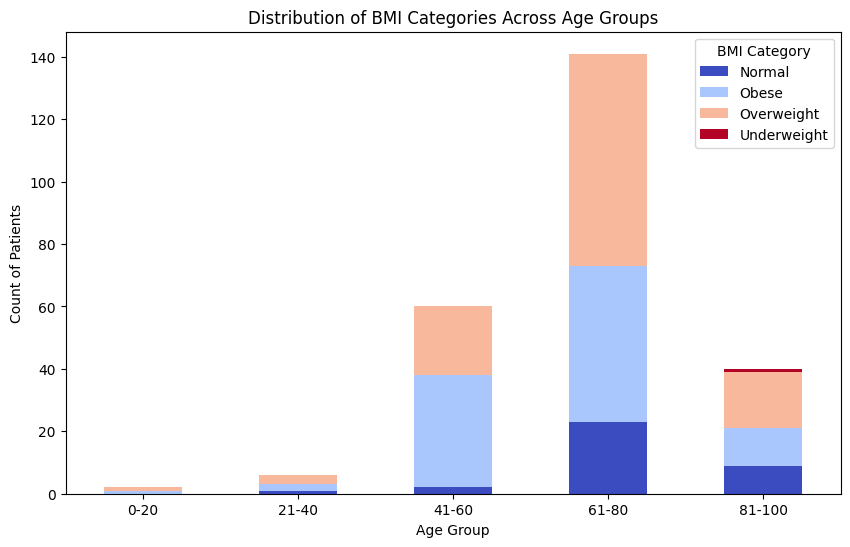

In [ ]:


bins = [0, 20, 40, 60, 80, 100]  # Age ranges
labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]
df1["age_group"] = pd.cut(df1["age"], bins=bins, labels=labels, right=False)

# Create a grouped DataFrame
bmi_age_grouped = df1.groupby(["age_group", "bmi"]).size().unstack()

# Plot
bmi_age_grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")

# Labels & Title
plt.xlabel("Age Group")
plt.ylabel("Count of Patients")
plt.title("Distribution of BMI Categories Across Age Groups")
plt.legend(title="BMI Category")
plt.xticks(rotation=0)

# Show plot
plt.show()


* Middle-aged and elderly individuals (40+) with high BMI are at the greatest risk of stroke.
* Obesity compounds the age-related stroke risk, as excess weight contributes to cardiovascular stress.
* Underweight individuals in old age may experience strokes.


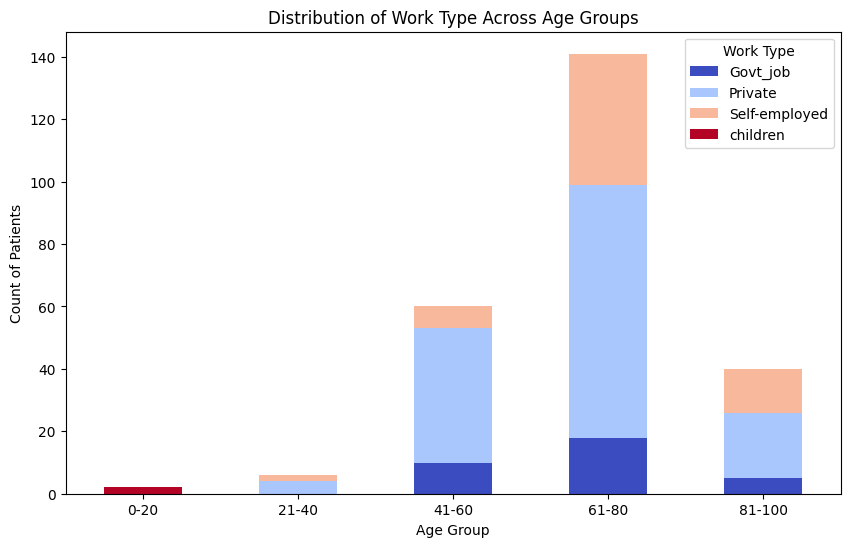

In [ ]:

# Define Age Groups
bins = [0, 20, 40, 60, 80, 100]  # Age ranges
labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]
df1["age_group"] = pd.cut(df1["age"], bins=bins, labels=labels, right=False)

# Create a grouped DataFrame
worktype_age_grouped = df1.groupby(["age_group", "work_type"]).size().unstack()

# Plot
worktype_age_grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")

# Labels & Title
plt.xlabel("Age Group")
plt.ylabel("Count of Patients")
plt.title("Distribution of Work Type Across Age Groups")
plt.legend(title="Work Type")
plt.xticks(rotation=0)

# Show plot
plt.show()

* Stroke is most common in the 61-80 age group, with private-sector self-employed individuals at the highest risk.

* Government workers have fewer stroke cases, suggesting that job stability and benefits might help lower risk.

* Almost no stroke cases in children and young adults (0-40 years old).

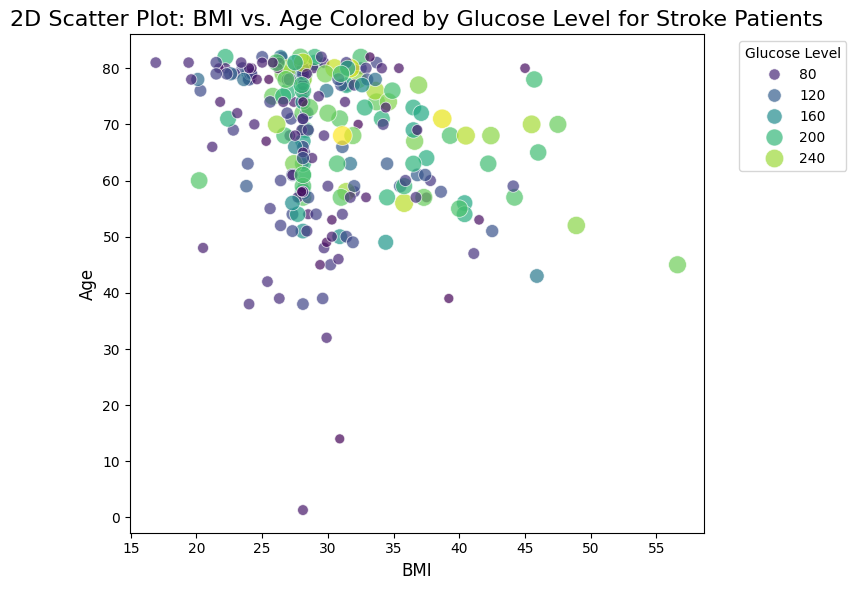

In [ ]:
stroke_df = df[df['stroke'] == 1]


plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=stroke_df, x='bmi', y='age', hue='avg_glucose_level', palette='viridis', size='avg_glucose_level', sizes=(50, 200), alpha=0.7)

plt.xlabel('BMI', size=12)
plt.ylabel('Age', size=12)
plt.title('2D Scatter Plot: BMI vs. Age Colored by Glucose Level for Stroke Patients', size=16)
plt.legend(title='Glucose Level', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

* Stroke is more prevalent in older individuals (60-80 years), with a strong link to BMI and glucose levels.
* Most stroke patients have a BMI between 25-40, indicating overweight or obesity as common factors, while extreme cases (BMI > 45) suggest a higher risk.
* Older patients and those with higher BMI tend to have elevated glucose levels, reinforcing the connection between age, obesity, diabetes, and stroke risk.

In [ ]:
# count number of unique values in each categorical column, to change them with integer values.
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(df[col].unique()) :
        print(unique, ':', index)
    print('_'*45)

column : gender
Male : 0
Female : 1
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [ ]:
# gender
data_2 = df.replace(
    {'gender' : {'Male' : 0, 'Female' : 1}}
)

# ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

# work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

# smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

# Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [ ]:
X_temp = data_2.drop(columns='stroke')
y = data_2.stroke

In [ ]:
# To decrease effect of larg values, we use MinMaxScaler to normalize X.
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,0.500144,0.586025,0.526733,0.097475,0.054022,0.343707,0.209532,0.491877,0.235529,0.212638,0.528610
std,0.290396,0.492592,0.276045,0.296633,0.226084,0.474991,0.279686,0.499983,0.209053,0.088199,0.364135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242518,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.102114,0.154639,0.333333
50%,0.505743,1.000000,0.548340,0.000000,0.000000,0.000000,0.000000,0.000000,0.169698,0.203895,0.333333
75%,0.748919,1.000000,0.743652,0.000000,0.000000,1.000000,0.500000,1.000000,0.272228,0.257732,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    plt.show()

In [ ]:
# Splite X, y to train & test dataset to 75%training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

#** random forest**


In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 100, 250, 500],  # Number of trees in the forest
    'criterion' : ['gini', 'entropy', 'log_loss'],# Splitting criteria
    'max_features' : ['sqrt', 'log2'] # Number of features to consider when splitting
}

rf = RandomForestClassifier(n_jobs=-1) #allows parallel computation using all available CPU cores, speeding up training
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}
accuracy :  0.9517100467798085


In [ ]:
# Model :
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.949


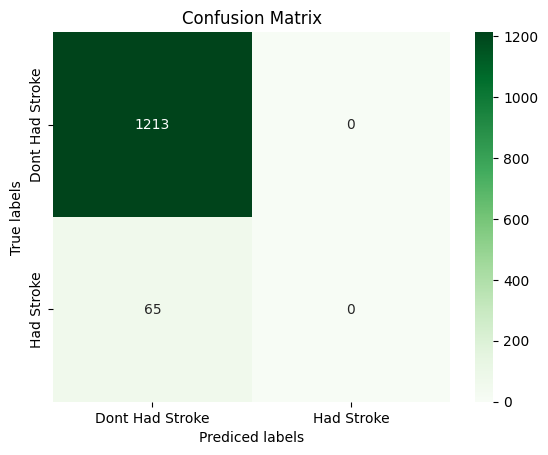

In [ ]:
plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



In [ ]:
#logisitc regression


In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],## Regularization strength
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] #Optimization algorithms used for fitting
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'saga'}
accuracy :  0.7767787206266318


In [ ]:
# Model
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.753


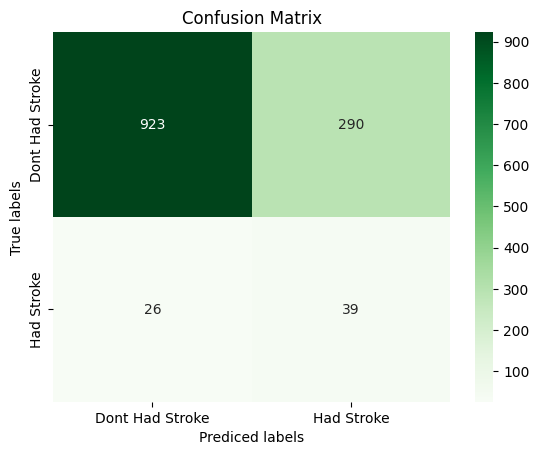

In [ ]:
plot_confusion_matrix(y_test, y_pred_lr)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1213
           1       0.12      0.60      0.20        65

    accuracy                           0.75      1278
   macro avg       0.55      0.68      0.53      1278
weighted avg       0.93      0.75      0.82      1278



# ** svc **

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], # Regularization parameter
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)
print('accuracy : ', svc_cv.best_score_)

Tuned hyper parameters :  {'C': 0.001, 'gamma': 0.001}
accuracy :  0.9519711433855529


In [ ]:
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_test)

svc_score = round(svc.score(X_test, y_test), 3)
print('SVC Score : ', svc_score)

SVC Score :  0.949


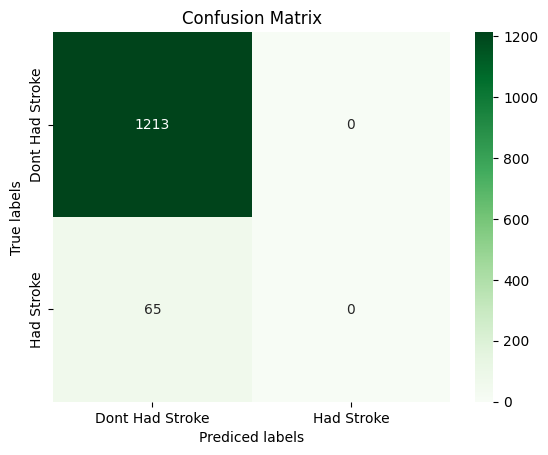

In [ ]:
plot_confusion_matrix(y_test, y_pred_svc)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



# ** knn **

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)), # Odd values of K from 3 to 19
    'p' : [1, 2, 3, 4] # Different distance metrics
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': np.int64(11), 'p': 4}
accuracy :  0.9519711433855529


In [ ]:
# Model :
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
y_pred_knn = knn_cv.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score :', knn_score)

KNeighborsClassifier Score : 0.949


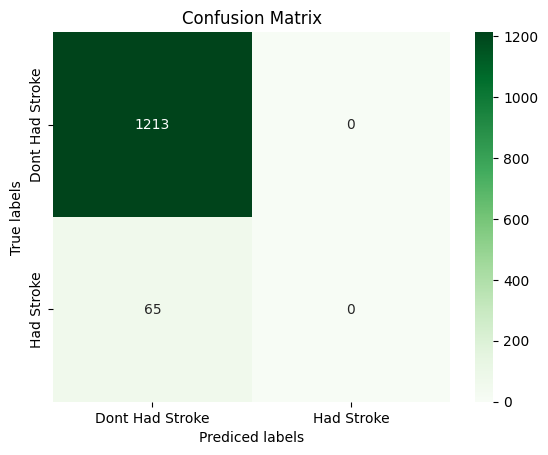

In [ ]:
plot_confusion_matrix(y_test, y_pred_knn)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



# ** decision tree **

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'], # Splitting criteria
    'splitter' : ['best', 'random'], # Best or random split selection
    'max_depth' : list(np.arange(4, 30, 1)) # Different depths from 4 to 29
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)
print('accuracy : ', tree_cv.best_score_)


Tuned hyper parameters :  {'criterion': 'gini', 'max_depth': np.int64(5), 'splitter': 'random'}
accuracy :  0.952493336597041


In [ ]:
# Model :
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

tree_score = round(tree.score(X_test, y_test), 3)
print('DecisionTreeClassifier Score : ', tree_score)

DecisionTreeClassifier Score :  0.948


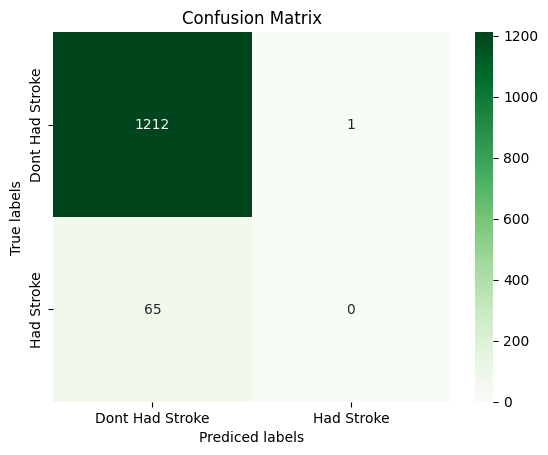

In [ ]:
plot_confusion_matrix(y_test, y_pred_tree)

In [ ]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



# ** RESULTS **

In [ ]:
#Result
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score]
})

result

,Algorithm,Score
0,RandomForestClassifier,0.949
1,LogisticRegression,0.753
2,SVC,0.949
3,DecisionTreeClassifier,0.948
4,KNeighborsClassifier,0.949
